In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


plt.style.use('ggplot')

In [55]:
df = pd.read_csv('krisha_cleaned_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25347 entries, 0 to 25346
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   название                 25347 non-null  object 
 1   цена                     25347 non-null  int64  
 2   Город                    25347 non-null  object 
 3   Тип дома                 1966 non-null   object 
 4   Год постройки            2701 non-null   float64
 5   Состояние                1985 non-null   object 
 6   Состояние квартиры       17688 non-null  object 
 7   Санузел                  20765 non-null  object 
 8   Балкон                   15809 non-null  object 
 9   Балкон остеклён          1507 non-null   object 
 10  Дверь                    2094 non-null   object 
 11  Парковка                 1357 non-null   object 
 12  Квартира меблирована     22477 non-null  object 
 13  Пол                      2027 non-null   object 
 14  Потолки               

## Обработка категориальных значений

Мы будем тренировать модель что бы она могла определять кол-во просмотров,   
поэтому не хотелось бы иметь дело с кучей Null в данных,   
поэтому уберем изначально те строки у которых слишком мало значений (<0.7),  
а те которые можно как то заполнить постараемся заполнить

In [56]:
def plot_views_by_cat(feature,views='просмотры'):
    sns.boxplot(df[[feature, views]].fillna({feature:'Не указано'}),
               x = feature,
               y = views,
               showfliers=False
               )
    plt.xticks(rotation=15)
    plt.show()

In [57]:
not_null_proportions = df.select_dtypes(include='object').notna().mean(axis=0) 

In [58]:
not_null_proportions[not_null_proportions < 0.9].sort_values()

Парковка                  0.053537
Балкон остеклён           0.059455
Потолки                   0.067543
Тип дома                  0.077563
Состояние                 0.078313
Пол                       0.079970
Дверь                     0.082613
Лоджия                    0.411923
Балкон                    0.623703
Состояние квартиры        0.697834
Окна                      0.739299
Кому подойдет квартира    0.769756
Ванная комната            0.816389
Санузел                   0.819229
Мебель                    0.826449
Удобства                  0.838955
Квартира меблирована      0.886772
dtype: float64

Парковка

In [59]:
df['Парковка'].value_counts(dropna=False)

NaN                         23990
паркинг                       686
рядом охраняемая стоянка      662
гараж                           9
Name: Парковка, dtype: int64

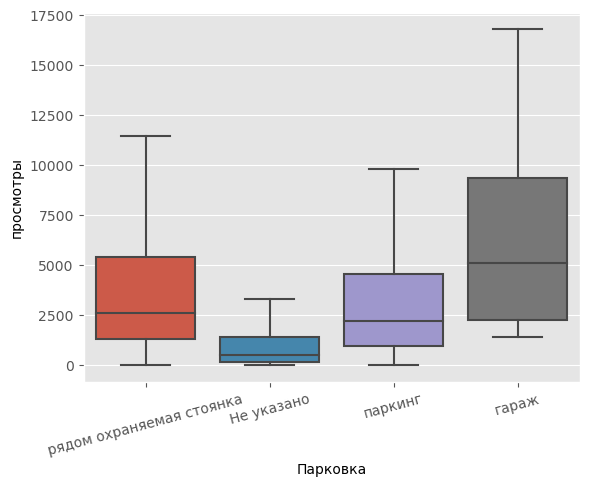

In [60]:
plot_views_by_cat('Парковка')

In [61]:
# убирать видно не совсем есть смысл поэтому оставим как не указано
df['Парковка'] = df['Парковка'].fillna('Не указан')

Балкон остеклён

In [62]:
df['Балкон остеклён'].value_counts()

да     1501
нет       6
Name: Балкон остеклён, dtype: int64

In [63]:
# убираем
df = df.drop(columns=['Балкон остеклён'])

Потолки

In [64]:
df['Потолки'].value_counts()

3 м       525
2.7 м     403
2.8 м     321
2.5 м     187
2.6 м      44
2.9 м      37
3.2 м      28
2.75 м     26
2.85 м     22
2 м        14
3.1 м      13
3.3 м      11
2.4 м      11
2.3 м       8
3.5 м       6
3.15 м      4
2.1 м       4
27 м        4
2.65 м      3
25 м        3
3.25 м      3
3.7 м       2
3.8 м       2
5 м         2
2.95 м      2
2.55 м      2
28 м        2
2.53 м      1
2.54 м      1
2.98 м      1
4 м         1
2.68 м      1
2.58 м      1
2.2 м       1
2.45 м      1
2.59 м      1
26 м        1
100 м       1
2.79 м      1
5.5 м       1
2.69 м      1
4.2 м       1
3.35 м      1
10 м        1
30 м        1
2.74 м      1
2.93 м      1
2.66 м      1
3.18 м      1
3.05 м      1
Name: Потолки, dtype: int64

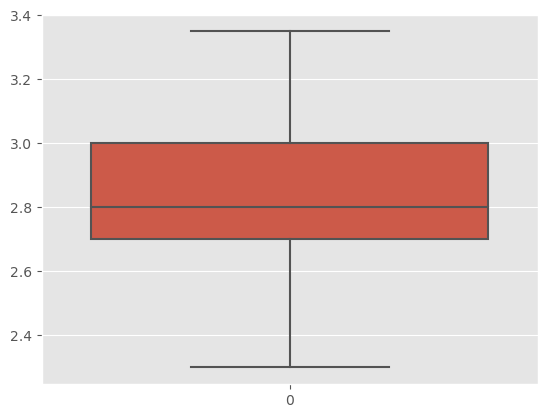

In [65]:
def extract_ints_and_dots(input_str):
    # Define a regular expression pattern to find integers and dots
    pattern = re.compile(r'[0-9.]+')

    # Use the pattern to find matches in the input string
    matches = pattern.findall(input_str)

    # Concatenate the matches to form the result string
    result_str = ''.join(matches)

    return result_str
sns.boxplot(
    df['Потолки'].apply(lambda x: x if isinstance(x,float) else extract_ints_and_dots(str(x))),
    showfliers=False
    )
plt.show()

In [66]:
# можно было заменить на среднюю или медиану, но это сильно может исказить картиру так что
# убираем
df = df.drop(columns=['Потолки'])

Тип дома

In [67]:
df['Тип дома'].value_counts()

кирпичный     795
монолитный    747
панельный     393
иное           31
Name: Тип дома, dtype: int64

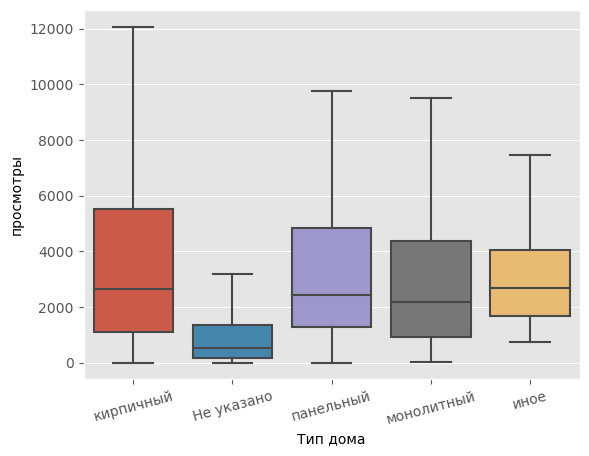

In [68]:
plot_views_by_cat('Тип дома')

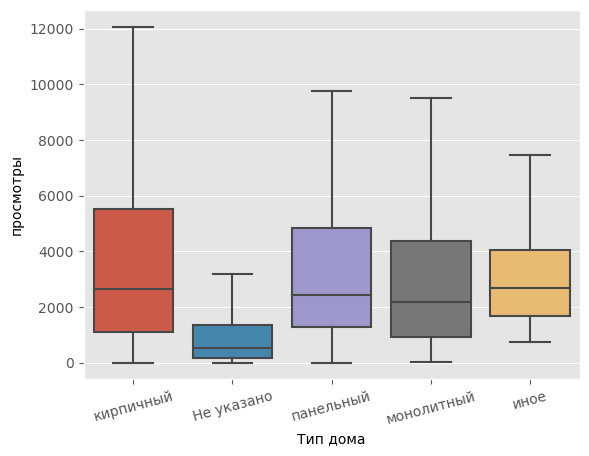

In [69]:
plot_views_by_cat('Тип дома')

In [70]:
# отлично, заменяем
df['Тип дома']  = df['Тип дома'].apply(lambda x: 'Не указан' if pd.isna(x)  else 'указан')

Пол

In [71]:
df['Пол'].value_counts()

ламинат      1111
линолеум      627
паркет        241
плитка         17
дерево         16
ковролан       14
пробковый       1
Name: Пол, dtype: int64

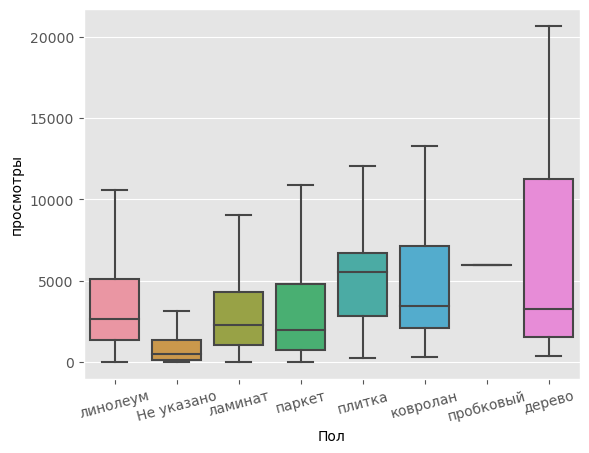

In [72]:
plot_views_by_cat('Пол')

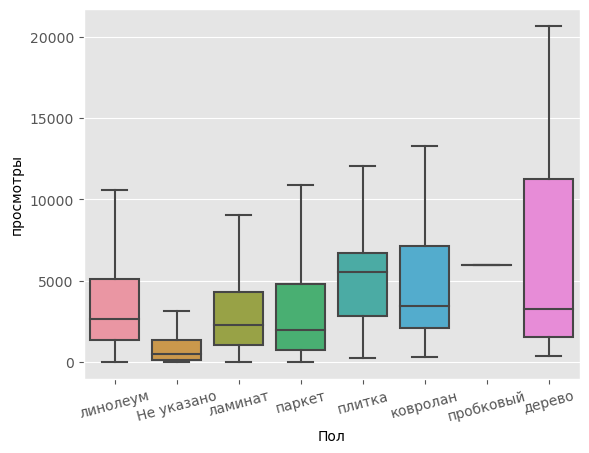

In [73]:
# Последних три мало, а остальные похожи
# попробуем как с типом дома
plot_views_by_cat('Пол')

In [74]:
# отлично, заменяем
df['Пол']  = df['Пол'].apply(lambda x: 'Не указан' if pd.isna(x)  else 'указан')

Дверь

In [75]:
df['Дверь'].value_counts()

металлическая    1672
бронированная     361
деревянная         61
Name: Дверь, dtype: int64

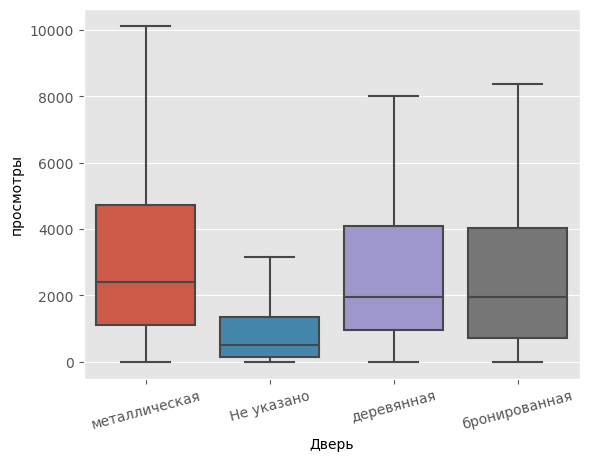

In [76]:
plot_views_by_cat('Дверь')

In [77]:
# и еще раз заменяем
df['Дверь']  = df['Дверь'].apply(lambda x: 'Не указан' if pd.isna(x)  else 'указан')

Лоджия

In [78]:
df['Лоджия'].value_counts()

1      5973
нет    3615
2       853
Name: Лоджия, dtype: int64

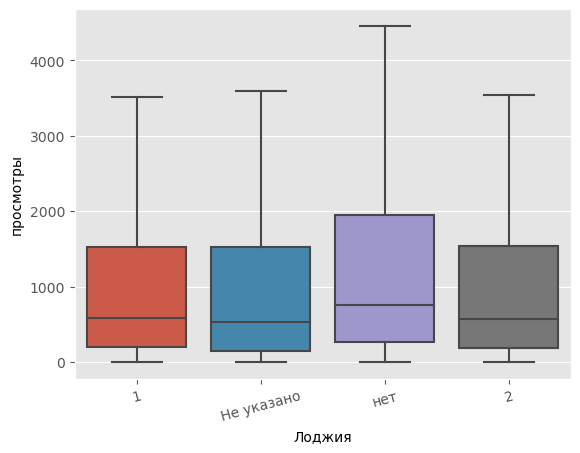

In [79]:
plot_views_by_cat('Лоджия')

In [80]:
# оставим не указанные как пусты а нет заменим на 0
df['Лоджия'] = df['Лоджия'].apply(lambda x: 0 if x == 'нет' else x).astype(float)

Балкон 

Балкон - это выступающая площадка, которая находится на выносной плите и имеет перила по периметру. Основным отличием является то, что он выступает за пределы здания и не имеет стен по бокам и спереди. Лоджия - это часть здания , внутреннее пространство которой открыто с одной стороны, т.

In [81]:
df['Балкон'].value_counts()

1                                10310
нет                               3111
2                                 1377
лоджия                             430
балкон                             404
несколько балконов или лоджий       89
балкон и лоджия                     88
Name: Балкон, dtype: int64

In [82]:
def balcon(string):
    if string in ('нет', 'лоджия'):
        return '0'
    if string in ('балкон', 'несколько балконов или лоджий', 'балкон и лоджия'):
        return '1'
    
    return string
    
df['Балкон'] = df['Балкон'].apply(balcon).astype(float)

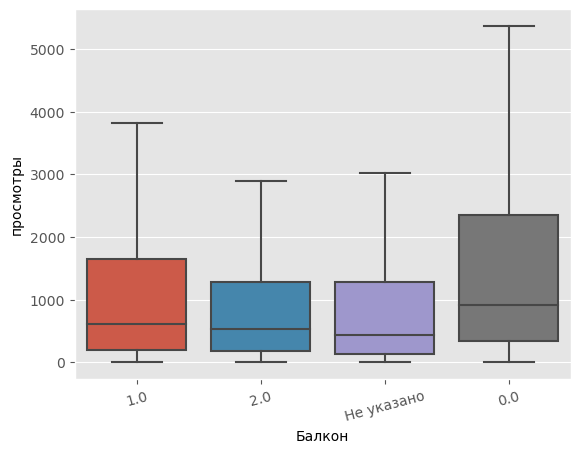

In [83]:
plot_views_by_cat('Балкон')

In [84]:
# так и оставим

Окна

In [85]:
df['Окна'].value_counts()

во двор              6504
на улицу             6125
во двор, на улицу    4927
на улицу, во двор    1183
Name: Окна, dtype: int64

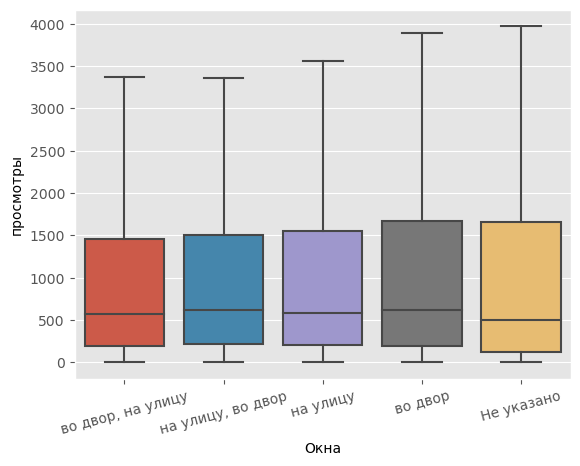

In [86]:
plot_views_by_cat('Окна')

In [87]:
# сам по себе признак не сильно имеет свойство определять таргет
# так что вырасываем
df = df.drop(columns=['Окна'])

Ванная комната

In [88]:
df['Ванная комната'].value_counts()

ванна                    15901
душевая кабина            3443
душевая кабина, ванна     1083
ванна, душевая кабина      266
Name: Ванная комната, dtype: int64

In [89]:
df['Ванная комната'] = df['Ванная комната'].apply(
    lambda x: 'душ и ванна' if x in ('душевая кабина, ванна', 'ванна, душевая кабина') 
    else x
)

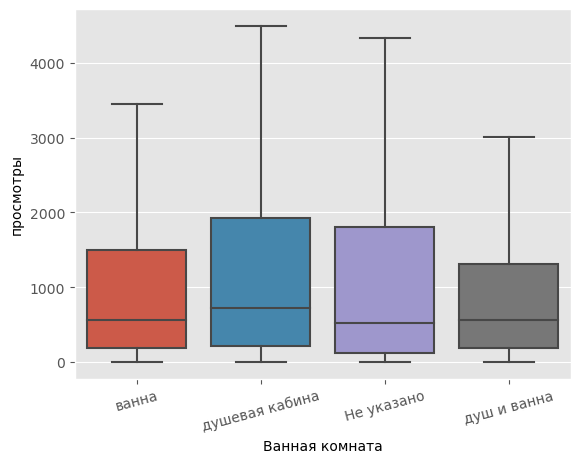

In [90]:
plot_views_by_cat('Ванная комната')

In [91]:
# не убрать и не заменить

Санузел

In [92]:
df['Санузел'].value_counts()

совмещен              13018
разделен               6590
совмещенный             534
раздельный              262
2 с/у и более           182
разделен, совмещен      142
совмещен, разделен       36
нет                       1
Name: Санузел, dtype: int64

In [93]:
# не понимаю в чем разница поэтому заменю пожалуй
def wc_replace(string):
    if string in ('совмещен','совмещенный'):
        return 'совмещен'
    if string in ('разделен','раздельный'):
        return 'разделен'
    if string in ('2 с/у и более' ,'разделен, совмещен', 'совмещен, разделен'):
        return '2 с/у >='
    return float('nan')
    
df['Санузел'] = df['Санузел'].apply(wc_replace)

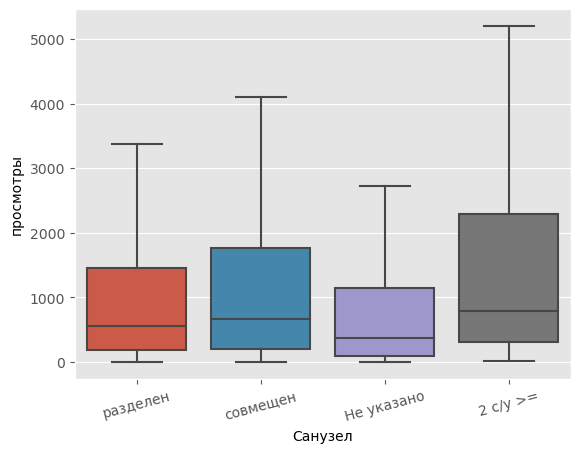

In [94]:
plot_views_by_cat('Санузел')

In [95]:
# так и оставим

Пока этого достаточно

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25347 entries, 0 to 25346
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   название                 25347 non-null  object 
 1   цена                     25347 non-null  int64  
 2   Город                    25347 non-null  object 
 3   Тип дома                 25347 non-null  object 
 4   Год постройки            2701 non-null   float64
 5   Состояние                1985 non-null   object 
 6   Состояние квартиры       17688 non-null  object 
 7   Санузел                  20764 non-null  object 
 8   Балкон                   15809 non-null  float64
 9   Дверь                    25347 non-null  object 
 10  Парковка                 25347 non-null  object 
 11  Квартира меблирована     22477 non-null  object 
 12  Пол                      25347 non-null  object 
 13  Бывшее общежитие         25258 non-null  object 
 14  Мебель                

In [97]:
# на последок, попробуем посмотреть на способность по этим данным предсказывать

In [98]:
train_data = df.drop(
    columns= ['название', 'Мебель', 'Удобства', 'Кому подойдет квартира','url',
              'Срочно, торг', 'ТОП объявление', 'В горячих','×5 просмотров на неделю', '×15 просмотров на месяц']
).dropna(subset=['просмотры'])

In [99]:
train_data.select_dtypes(include=[object]).columns

Index(['Город', 'Тип дома', 'Состояние', 'Состояние квартиры', 'Санузел',
       'Дверь', 'Парковка', 'Квартира меблирована', 'Пол', 'Бывшее общежитие',
       'Ванная комната', 'Цвет', 'Владелец'],
      dtype='object')

In [100]:
categorical_columns = list(train_data.select_dtypes(include=[object]).columns)
train_data[categorical_columns] = train_data[categorical_columns].fillna('Не указано')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25024 entries, 0 to 25346
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   цена                  25024 non-null  int64  
 1   Город                 25024 non-null  object 
 2   Тип дома              25024 non-null  object 
 3   Год постройки         2673 non-null   float64
 4   Состояние             25024 non-null  object 
 5   Состояние квартиры    25024 non-null  object 
 6   Санузел               25024 non-null  object 
 7   Балкон                15607 non-null  float64
 8   Дверь                 25024 non-null  object 
 9   Парковка              25024 non-null  object 
 10  Квартира меблирована  25024 non-null  object 
 11  Пол                   25024 non-null  object 
 12  Бывшее общежитие      25024 non-null  object 
 13  Ванная комната        25024 non-null  object 
 14  Лоджия                10313 non-null  float64
 15  просмотры          

In [101]:
from catboost import CatBoostRegressor


reg = CatBoostRegressor(
    iterations=1000,
    cat_features=list(train_data.select_dtypes(include=[object]).columns)
)
reg.fit(
    train_data.drop(columns=['просмотры']),
    train_data['просмотры']
)

Learning rate set to 0.068096
0:	learn: 5075.5201201	total: 12.4ms	remaining: 12.4s
1:	learn: 5009.8820138	total: 26.5ms	remaining: 13.2s
2:	learn: 4957.0511346	total: 40ms	remaining: 13.3s
3:	learn: 4891.6304549	total: 50.7ms	remaining: 12.6s
4:	learn: 4848.3455454	total: 61.9ms	remaining: 12.3s
5:	learn: 4807.6905150	total: 72ms	remaining: 11.9s
6:	learn: 4755.1678434	total: 83.7ms	remaining: 11.9s
7:	learn: 4706.0713267	total: 95.8ms	remaining: 11.9s
8:	learn: 4669.3780973	total: 106ms	remaining: 11.7s
9:	learn: 4634.2911004	total: 117ms	remaining: 11.6s
10:	learn: 4596.1874686	total: 130ms	remaining: 11.7s
11:	learn: 4559.5262926	total: 143ms	remaining: 11.7s
12:	learn: 4525.8875439	total: 154ms	remaining: 11.7s
13:	learn: 4488.7840417	total: 164ms	remaining: 11.5s
14:	learn: 4439.5369622	total: 175ms	remaining: 11.5s
15:	learn: 4401.9098896	total: 185ms	remaining: 11.4s
16:	learn: 4377.2155703	total: 196ms	remaining: 11.4s
17:	learn: 4350.5171662	total: 209ms	remaining: 11.4s
18:	

In [102]:
feach_importances = pd.DataFrame({'importance':reg.feature_importances_,'feach':reg.feature_names_}).sort_values(by='importance')

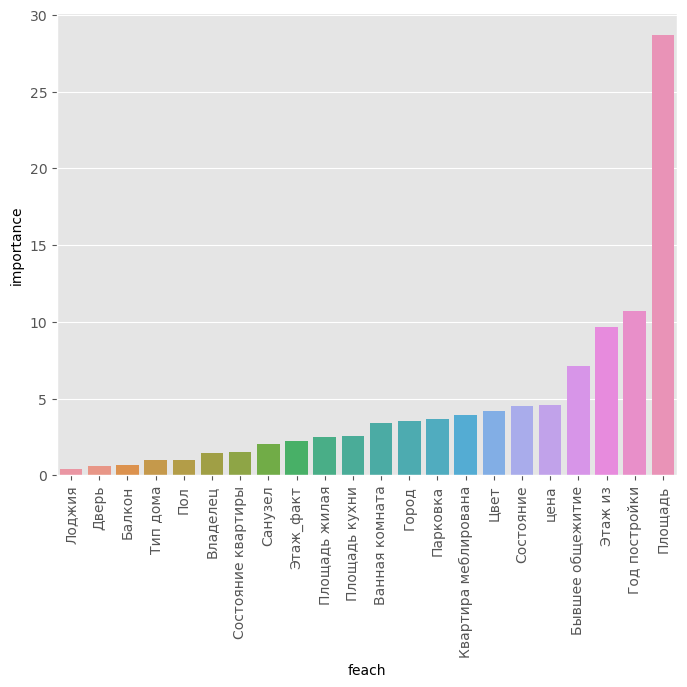

In [103]:
plt.figure(figsize=(8, 6))
sns.barplot(feach_importances, y='importance', x= 'feach')
plt.xticks(rotation=90)
plt.show()

In [104]:
# уберем наименее важные
df = df.drop(columns=['Лоджия', 'Дверь', 'Балкон', 'Тип дома','Пол'])

In [105]:
# поменяем очередность
df = df[[ 'название', 'Город' , 'Владелец','url',
    'цена','Год постройки', 'просмотры', 'Этаж_факт', 'Этаж из','Площадь','Площадь жилая', 'Площадь кухни',
    'Состояние', 'Состояние квартиры', 'Санузел', 'Парковка', 'Квартира меблирована','Бывшее общежитие',
    'Мебель', 'Удобства', 'Ванная комната', 'Кому подойдет квартира',
    'Цвет','×15 просмотров на месяц', '×5 просмотров на неделю', 'В горячих', 'ТОП объявление', 'Срочно, торг'
    ]]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25347 entries, 0 to 25346
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   название                 25347 non-null  object 
 1   Город                    25347 non-null  object 
 2   Владелец                 25347 non-null  object 
 3   url                      25347 non-null  object 
 4   цена                     25347 non-null  int64  
 5   Год постройки            2701 non-null   float64
 6   просмотры                25024 non-null  float64
 7   Этаж_факт                24852 non-null  float64
 8   Этаж из                  23510 non-null  float64
 9   Площадь                  25347 non-null  float64
 10  Площадь жилая            2124 non-null   float64
 11  Площадь кухни            12417 non-null  float64
 12  Состояние                1985 non-null   object 
 13  Состояние квартиры       17688 non-null  object 
 14  Санузел               

In [107]:
df.to_csv('krisha_cleaned_2.csv',index=False)